# PRODIGY INFOTECH 

# TASK DONE BY : BASWARAJ PATIL

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Data Cleaning

In [3]:
train_df = pd.read_csv('titanictn.csv')
test_df = pd.read_csv('titanictt.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
train_df = train_df.set_index('PassengerId')
test_df = test_df.set_index('PassengerId')

In [7]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,male,27.0,0,0,13.00,S
888,1,1,female,19.0,0,0,30.00,S
889,0,3,female,28.0,1,2,23.45,S
890,1,1,male,26.0,0,0,30.00,C
891,0,3,male,32.0,0,0,7.75,Q


In [18]:
train_df.shape

(889, 8)

In [21]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train_df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [8]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test_df.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1305,3,male,27.0,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S
1308,3,male,27.0,0,0,8.0500,S
1309,3,male,27.0,1,1,22.3583,C


In [20]:
test_df.shape

(418, 7)

In [22]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.841838,12.703770,0.896760,0.981429,55.850103
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
test_df.isnull()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,False,False,False,False,False,False,False
893,False,False,False,False,False,False,False
894,False,False,False,False,False,False,False
895,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1305,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False


# Data Exploration

In [9]:
train_df = train_df.drop(columns = ['Name', 'Ticket', 'Cabin'])
test_df = test_df.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [10]:
# Deal with missing vlaue in train_df

# Fill the missing values of Age with the median value of Age
train_df.Age = train_df.Age.fillna(train_df.Age.median())

# Drop the entire row for the missing values of Embarked 
train_df = train_df.dropna(axis = 0, how = 'any')

In [11]:
# Deal with missing vlaue in test_df

# Fill the missing values of Age with the median value of Age
test_df.Age = test_df.Age.fillna(test_df.Age.median())

# Fill the missing values of Fare with the median value of Fare
test_df.Fare = test_df.Fare.fillna(test_df.Fare.median())

In [12]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [13]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,27.0,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [14]:
categorical_var = ['Pclass', 'Sex', 'Embarked']
train_df_ohe = pd.get_dummies(train_df, columns=categorical_var, drop_first=True)
test_df_ohe = pd.get_dummies(test_df, columns=categorical_var, drop_first=True)

In [15]:
X_train_dev = train_df_ohe.drop(columns='Survived')
y_train_dev = train_df_ohe['Survived']

X_test = test_df_ohe

Text(0, 0.5, 'Distribution of target variable')

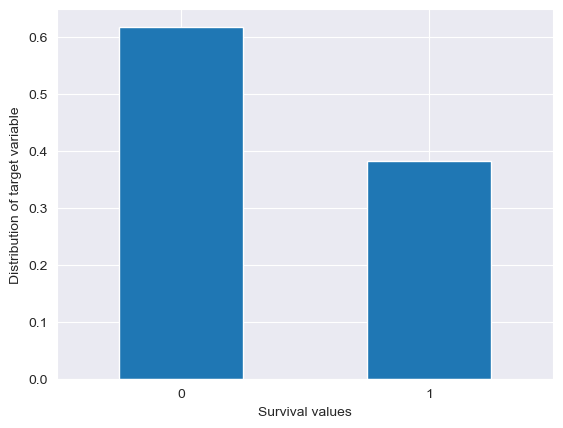

In [16]:
y_train_dev.value_counts(normalize = True).plot(kind='bar', rot=0)
plt.xlabel('Survival values')
plt.ylabel('Distribution of target variable')

<Axes: xlabel='Pclass', ylabel='count'>

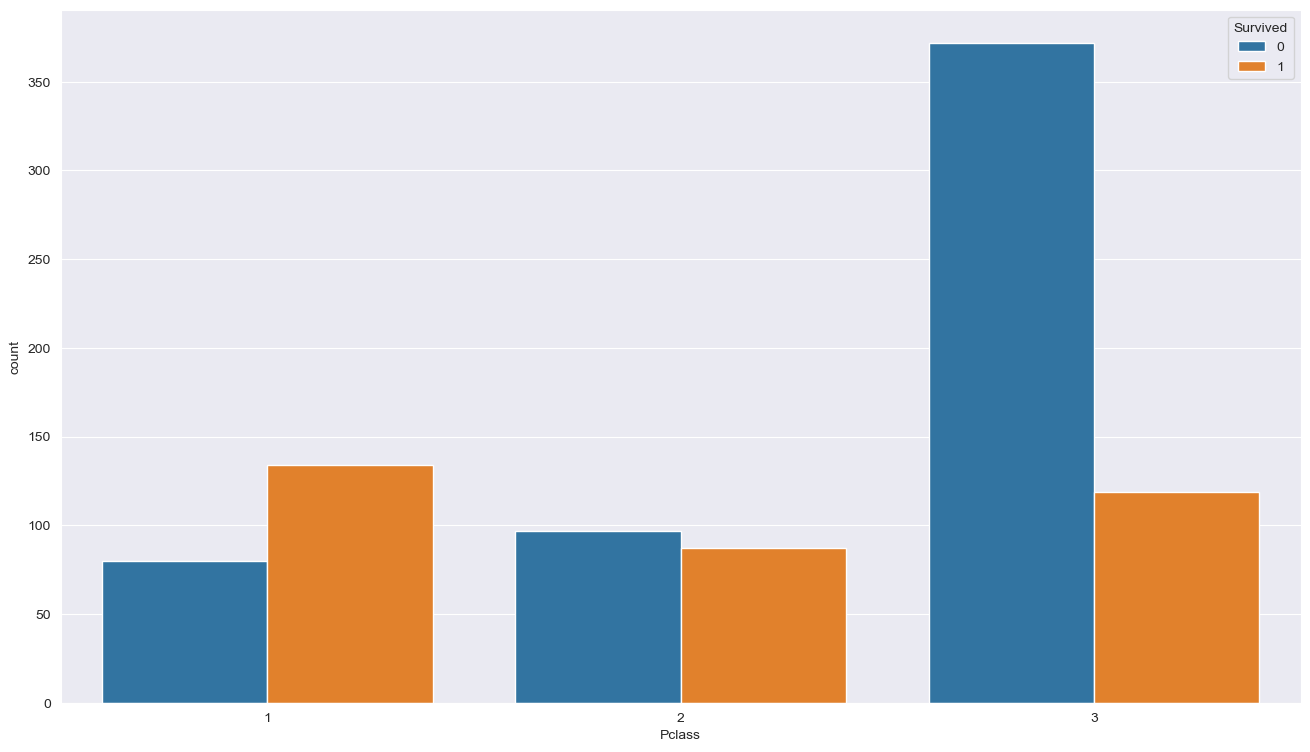

In [26]:
plt.figure(figsize = (16,9))
sns.countplot(x = "Pclass",hue = "Survived",data = train_df)

<Axes: xlabel='Sex', ylabel='count'>

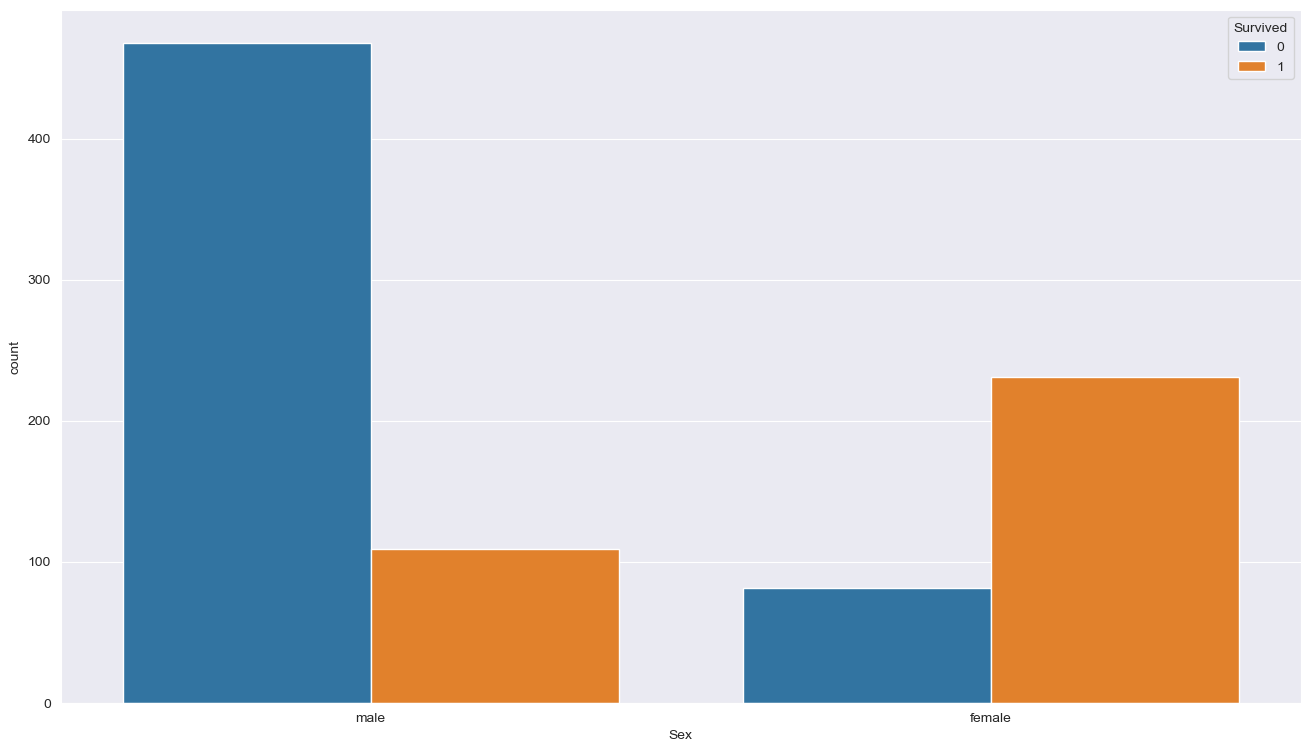

In [28]:
plt.figure(figsize = (16,9))
sns.countplot(x = "Sex",hue = "Survived",data = train_df)

<Axes: xlabel='Age', ylabel='count'>

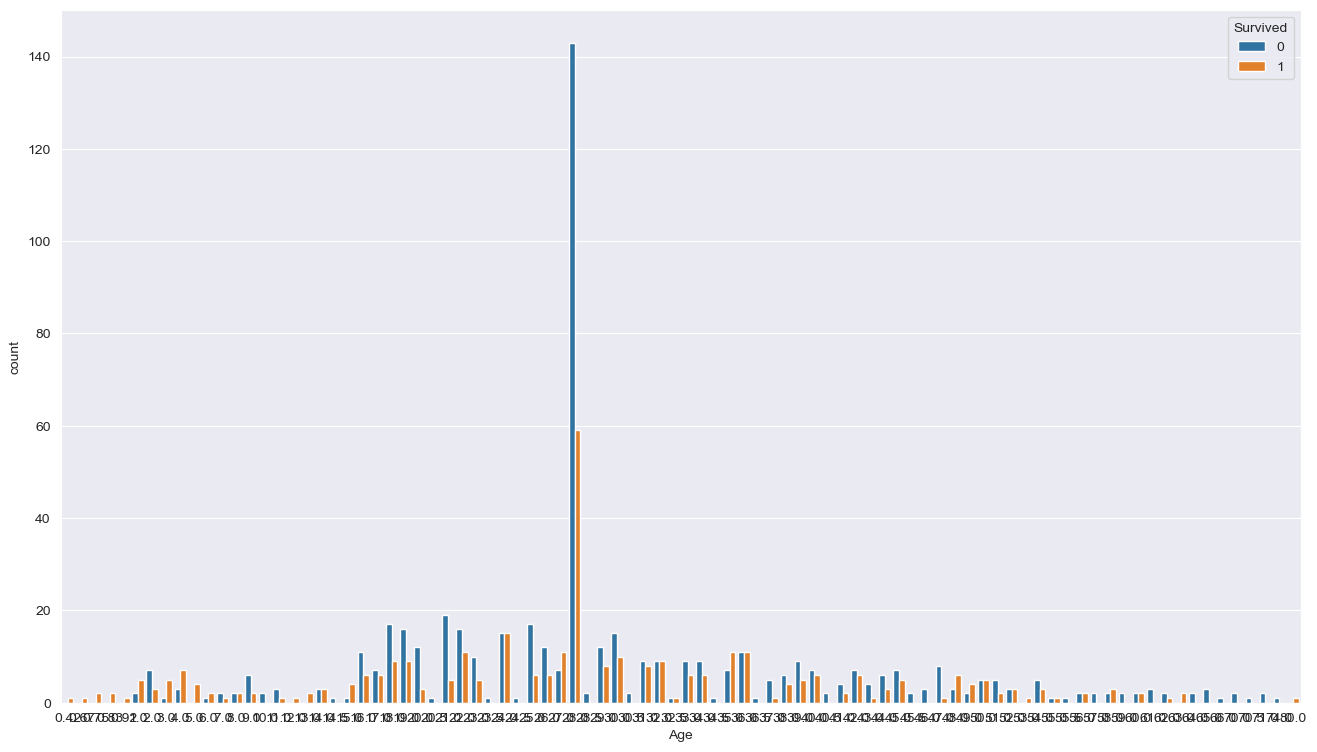

In [29]:
plt.figure(figsize = (16,9))
sns.countplot(x = "Age",hue = "Survived",data = train_df)

<Axes: xlabel='SibSp', ylabel='count'>

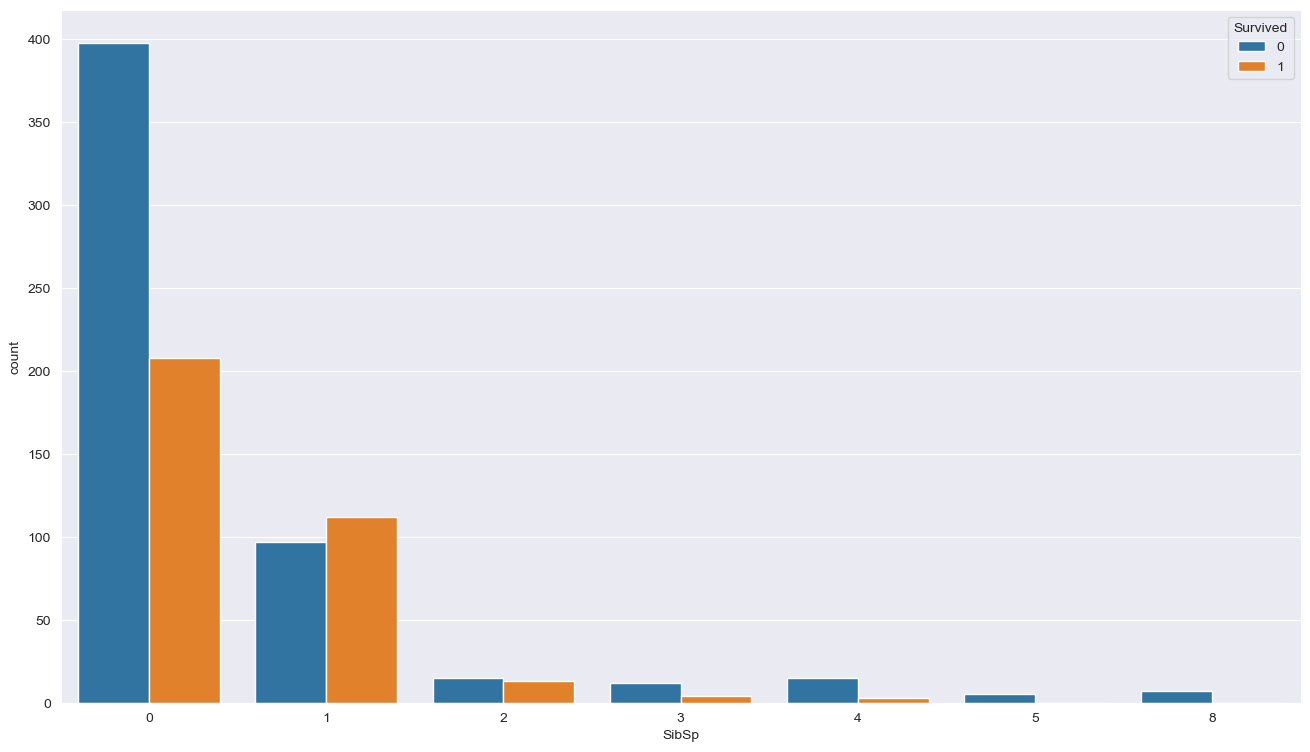

In [30]:
plt.figure(figsize = (16,9))
sns.countplot(x = "SibSp",hue = "Survived",data = train_df)

<Axes: xlabel='Parch', ylabel='count'>

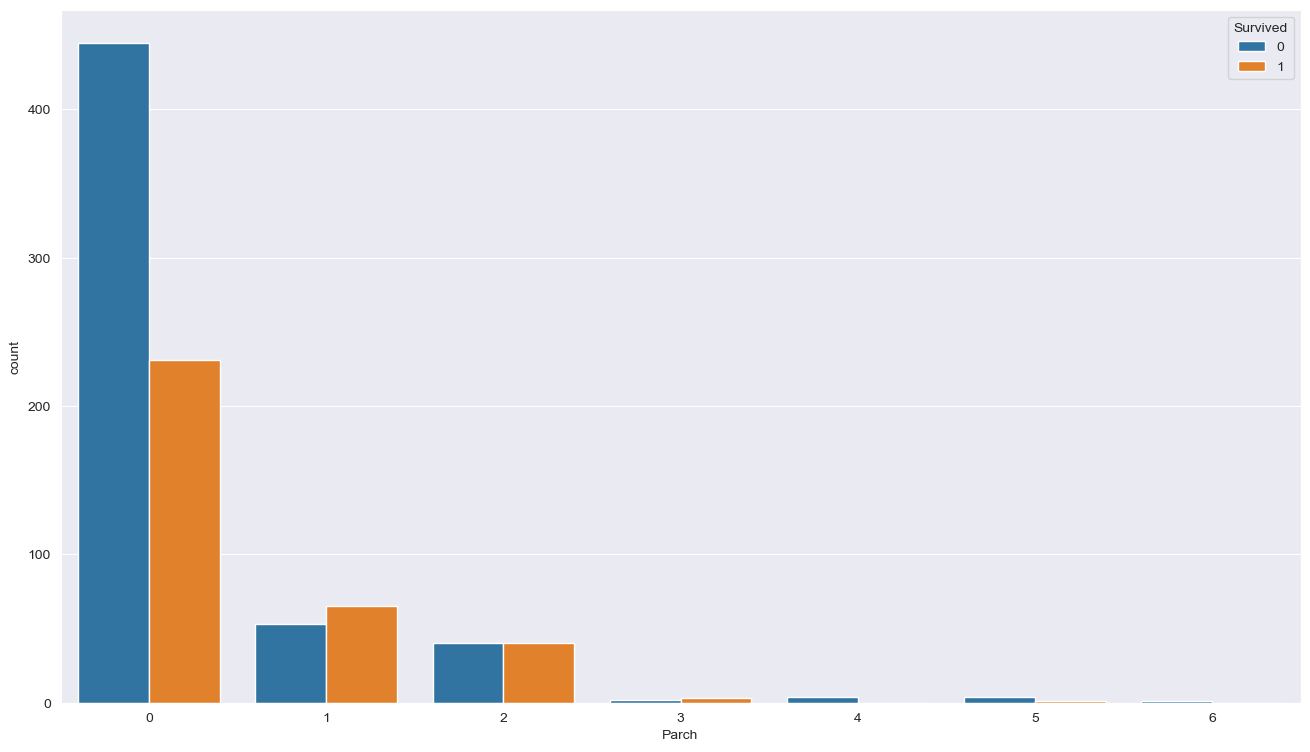

In [31]:
plt.figure(figsize = (16,9))
sns.countplot(x = "Parch",hue = "Survived",data = train_df)

<Axes: xlabel='Age', ylabel='Count'>

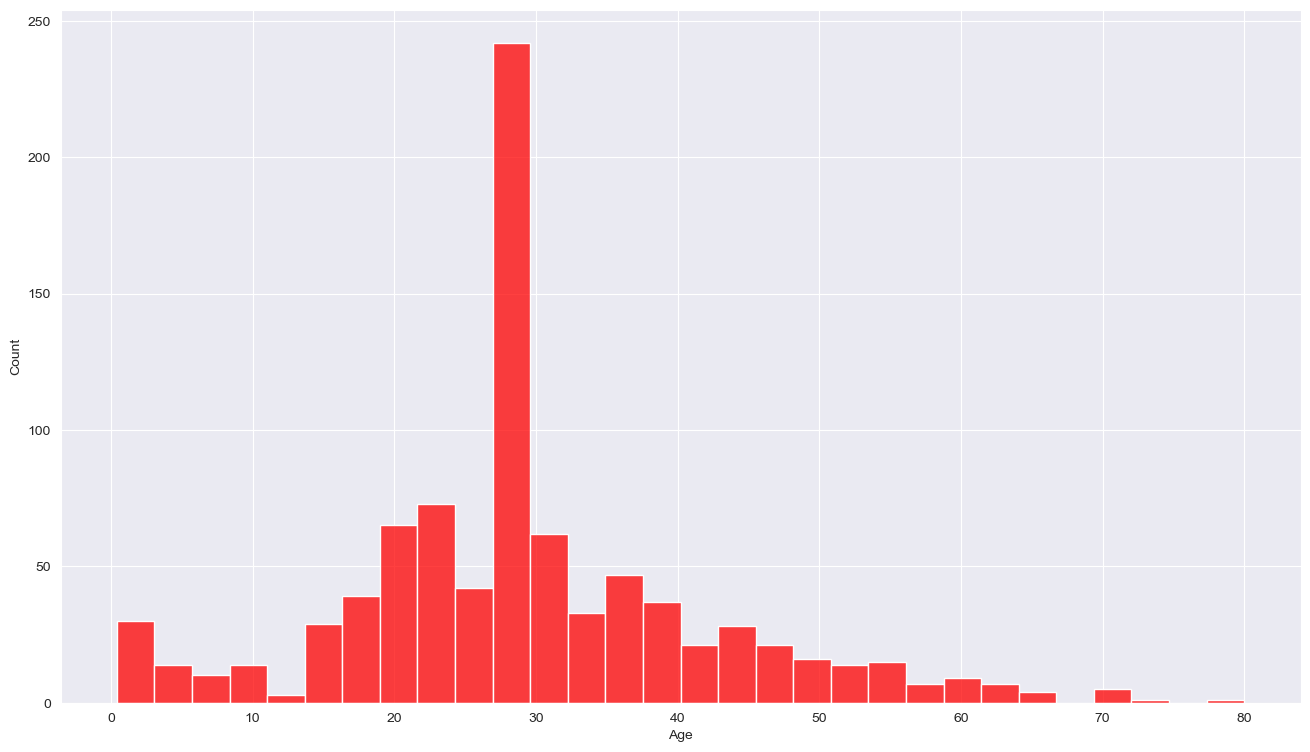

In [36]:
plt.figure(figsize = (16,9))
sns.histplot(train_df["Age"],color = "red")

<Axes: xlabel='Fare', ylabel='Count'>

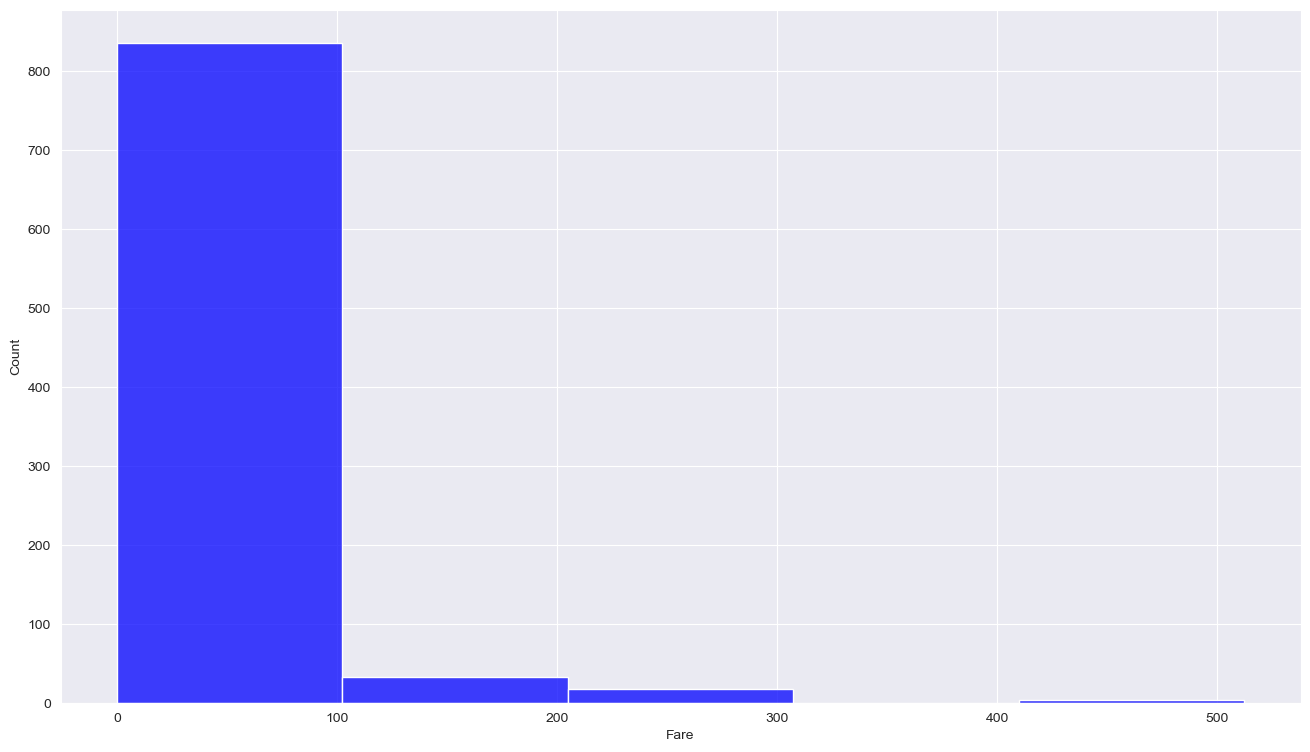

In [42]:
plt.figure(figsize = (16,9))
sns.histplot(train_df["Fare"],color = "b",bins = 5)

In [43]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7403846153846154


In [44]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Thank you